# Task 3: Linear Regression – House Price Prediction

## Objective
To implement and understand simple and multiple linear regression using the Housing dataset.

## Tools Used
- Python
- Pandas
- Scikit-learn
- Matplotlib


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
df = pd.read_csv("Housing.csv")
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
df.isnull().sum()


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
X = df.drop("price", axis=1)
y = df["price"]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [9]:
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [11]:
y_pred = model.predict(X_test)


In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r2)


MAE: 970043.4039201637
MSE: 1754318687330.6643
R2 Score: 0.6529242642153184


## Model Performance Interpretation

- MAE represents the average absolute error between predicted and actual prices.
- MSE penalizes large errors more than MAE.
- R² score indicates how much variance in house prices is explained by the model.

An R² score closer to 1 indicates better model performance.


In [16]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print("y_pred shape:", y_pred.shape)


X_test shape: (109, 13)
y_test shape: (109,)
y_pred shape: (109,)


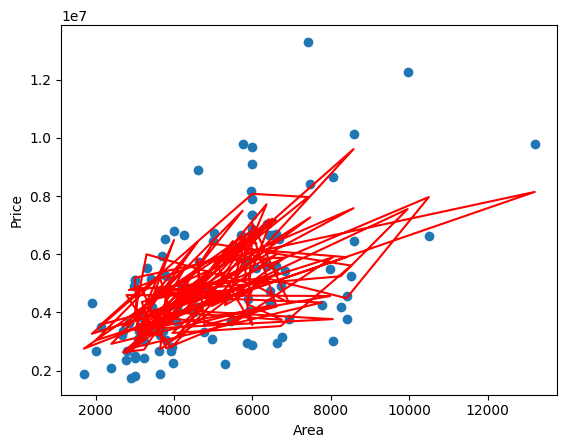

In [13]:
plt.scatter(X_test['area'], y_test)
plt.plot(X_test['area'], y_pred, color='red')
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()


In [15]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: 260032.35760741215
Coefficients: [ 2.35968805e+02  7.67787016e+04  1.09444479e+06  4.07476595e+05
  2.24841913e+05  3.67919948e+05  2.31610037e+05  3.90251176e+05
  6.84649885e+05  7.91426736e+05  6.29890565e+05 -1.26881818e+05
 -4.13645062e+05]


## Coefficient Interpretation

The regression coefficients indicate the impact of each feature on house price.

- A positive coefficient means price increases when the feature increases.
- A negative coefficient means price decreases when the feature increases.


In [14]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
coeff_df


,Coefficient
area,2.359688e+02
bedrooms,7.677870e+04
bathrooms,1.094445e+06
stories,4.074766e+05
parking,2.248419e+05
mainroad_yes,3.679199e+05
guestroom_yes,2.316100e+05
basement_yes,3.902512e+05
hotwaterheating_yes,6.846499e+05
airconditioning_yes,7.914267e+05



## Residual Analysis

The residual plot checks whether errors are randomly distributed.
If residuals are randomly scattered around zero, the linear model is appropriate.

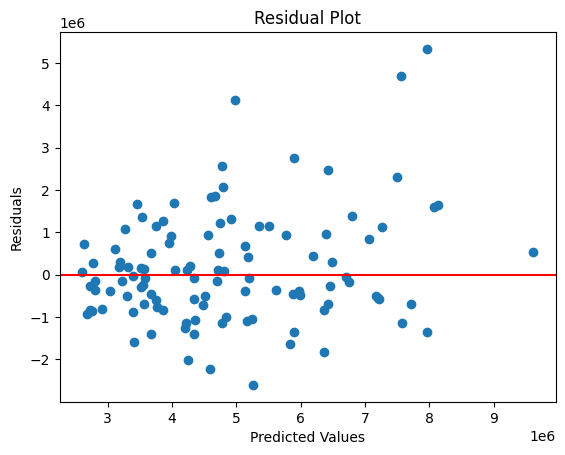

In [17]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


## Final Conclusion

The Linear Regression model was successfully implemented on the Housing dataset.

Key findings:
- Area is the most significant factor affecting house price.
- Amenities such as air conditioning and furnishing status increase price.
- The model explains a substantial portion of price variance based on the R² score.

The model can be further improved using feature engineering and advanced regression techniques.
